In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
from os.path import join as join
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc
import _ressources.analysis_tools.analysis as an
import _ressources.network as net

from scipy.optimize import curve_fit

main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/osmotic'

In [2]:
def lin(x, a, b) :
    return a*x+b

def fit_coeff(func, x_dat, y_dat) :
    x_dat_log, y_dat_log = x_dat, y_dat
    popt, pcov = curve_fit(func, x_dat_log, y_dat_log)
    return popt#, pcov

def average_powerlaw(a_list, k_list) :
    a_avg = np.average(a_list)
    k_avg = np.exp(np.average(k_list))
    return a_avg, k_avg

def calc_mu(theta) :
    return np.sin(theta)**2 / (2*theta - np.sin(2*theta))

def calc_chi(theta, gamma, kappa, ell0, L0) :
    mu = calc_mu(theta)
    return 0.5*mu*np.sin(theta)*gamma*kappa / (ell0*L0**3)
    #return gamma*kappa / (ell0*L0**3)

def calc_chi(theta, eps, kappa, ell0, L0) :
    mu = calc_mu(theta)
    return 0.5*mu*np.sin(theta)*eps*kappa / (ell0*L0**3)
    #return mu*np.sin(theta)*eps / (L0*ell0**3)


def lin(x, a, b) :
    return a*x+b

def fit_lin(t, N) :
    x, y = np.log(t), np.log(N)
    popt, pcov = curve_fit(lin, x, y)
    alpha, kappa = popt[0], np.exp(popt[1])
    alpha_std, kappa_std = pcov[0, 0], np.exp(pcov[1, 1])
    return kappa, alpha#, kappa_std, alpha_std
    

In [3]:
def import_osmotic(chis, chiv, path_list, plot_param_list, Nt_list, rescale = False, scatter=False, tau=1., L0=1., ell0=10.) :
    global mu, eps
    xiv = ell0*chiv
    T = (2*tau*L0*ell0)/((xiv**2)*mu*eps)
    
    label = False
    Nt_list[(chis, chiv)] = {}
    for n in range(nsim) :
        if chis==500 and chiv==50 : 
            n+=20
        Nt_list[(chis, chiv)][n] = np.loadtxt(os.path.join(path_list[(chis, chiv)][n], 'sim_nlum.dat'))
    return Nt_list[(chis, chiv)]

def make_path_dict(nsim, chis, chiv, pathdict, main_dir, subdir) :
    pathdict[(chis, chiv)] = {}
    for n in range(nsim) :
        subsubdir = 'chiv' + str(chiv) + '_chis' + str(chis)
        pathdict[(chis, chiv)][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))
    #return pathdict
    

In [4]:
mu = net.calc_muj_list(theta_list=np.pi/3.)
eps = 1e-3


## N(0) = 1000

In [5]:
ms = 5
lw = 1
alpha=1

plot_param_list = {(5, 5) : ['#780096', '+', ms, lw, alpha], 
                   (50, 5) : ['#FF36B8', '+', ms, lw, alpha], 
                   (500, 5) : ['#FF0700', '+', ms, lw, alpha], 
                   (5, 50) : ['#62FFFF', '+', ms, lw, alpha], 
                   (50, 50) : ['#009BFF', 'o', ms, lw, alpha], 
                   (500, 50) : ['#0000FF', '+', ms, lw, alpha], 
                   (5, 500) : ['#D9E34C', '+', ms, lw, alpha], 
                   (50, 500) : ['#63DB00', '+', ms, lw, alpha], 
                   (500, 500) : ['#00B400', '+', ms, lw, alpha]
                   }

In [6]:
#subdir = 'N1000/ell10/old_version'
subdir = 'N1000/ell10/'
nsim=20

path_list_N1000 = {}

pathdict = path_list_N1000

# ========================================================================================
# ===============================  chis = 5.   ===========================================
# ========================================================================================

# chis = 5, chiv = 5
chis = 5
chiv = 5
make_path_dict(nsim, chis, chiv, pathdict, main_dir, subdir)

#for n in range(nsim) :
#    subsubdir = 'chis' + str(chis) + '_chiv' + str(chiv)
#    path_list_N1000[(chis, chiv)][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))
    
# chis = 5, chiv = 50
chis = 5
chiv = 50
make_path_dict(nsim, chis, chiv, pathdict, main_dir, subdir)
    
# chis = 5, chiv = 50
chis = 5
chiv = 500
make_path_dict(nsim, chis, chiv, pathdict, main_dir, subdir)
    
# ========================================================================================
# ===============================  chis = 50.  ===========================================
# ========================================================================================
    
# chis = 50, chiv = 5
chis = 50
chiv = 5
make_path_dict(nsim, chis, chiv, pathdict, main_dir, subdir)
    
# chis = 50, chiv = 50
chis = 50
chiv = 50
make_path_dict(nsim, chis, chiv, pathdict, main_dir, subdir)

# chis = 50, chiv = 500
chis = 50
chiv = 500
make_path_dict(nsim, chis, chiv, pathdict, main_dir, subdir)
    
# ========================================================================================
# ===============================  chis = 500.  ==========================================
# ========================================================================================

# chis = 500, chiv = 5
chis = 500
chiv = 5
make_path_dict(nsim, chis, chiv, pathdict, main_dir, subdir)
    
# chis = 500, chiv = 50
chis = 500
chiv = 50
make_path_dict(nsim, chis, chiv, pathdict, main_dir, subdir)

# chis = 500, chiv = 500
chis = 500
chiv = 500
make_path_dict(nsim, chis, chiv, pathdict, main_dir, subdir)
    

In [9]:
Nt_list_N1000 = {}

#plt.figure(figsize=(8, 8))

rescale = True
scatter = False

#plt.xscale('log')
#plt.yscale('log')

# ========================================================================================
# ===============================  chiv = 5.  ============================================
# ========================================================================================

chiv5_chis5 = 0
if chiv5_chis5 :
    chis = 5
    chiv = 5
    Nt_list_N1000[(chis, chiv)] = import_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N1000, rescale = rescale, scatter=scatter)
    
chiv5_chis50 = 0
if chiv5_chis50 :
    chis = 50
    chiv = 5
    Nt_list_N1000[(chis, chiv)] = import_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N1000, rescale = rescale, scatter=scatter)
    
    
chiv5_chis500 = 0
if chiv5_chis500 :
    chis = 500
    chiv = 5
    Nt_list_N1000[(chis, chiv)] = import_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N100, rescale = rescale, scatter=scatter)

# ========================================================================================
# ===============================  chiv = 50.  ===========================================
# ========================================================================================

chiv50_chis5 = 1
if chiv50_chis5 :
    chis = 5
    chiv = 50
    Nt_list_N1000[(chis, chiv)] = import_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N1000, rescale = rescale, scatter=scatter)
    
chiv50_chis50 = 1
if chiv50_chis50 :
    chis = 50
    chiv = 50
    Nt_list_N1000[(chis, chiv)] = import_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N1000, rescale = rescale, scatter=scatter)
    
chiv50_chis500 = 0
if chiv50_chis500 :
    chis = 500
    chiv = 50
    Nt_list_N1000[(chis, chiv)] = import_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N1000, rescale = rescale, scatter=scatter)
    
# ========================================================================================
# ===============================  chiv = 500.  ==========================================
# ========================================================================================

chiv500_chis5 = 1
if chiv500_chis5 :
    chis = 5
    chiv = 500
    Nt_list_N1000[(chis, chiv)] = import_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N1000, rescale = rescale, scatter=scatter)

chiv500_chis50 = 1
if chiv500_chis50 :
    chis = 50
    chiv = 500
    Nt_list_N1000[(chis, chiv)] = import_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N1000, rescale = rescale, scatter=scatter)

chiv500_chis500 = 1
if chiv500_chis500 :
    chis = 500
    chiv = 500
    Nt_list_N1000[(chis, chiv)] = import_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N1000, rescale = rescale, scatter=scatter)


In [10]:
def gen_log_times(tmin, tmax, npts) :
    return np.logspace(np.log10(tmin), np.log10(tmax), npts)

def find_argmins(Nt, log_times) :
    index_array = np.zeros(len(log_times), dtype=int)
    for k in range(len(log_times)) :
        index_array[k] = np.argmin(np.abs(log_times[k]-Nt[:, 0]))
    return index_array

def gen_index_array(Nt, npts) :
    size = len(Nt)
    
    tmin = np.min(Nt[1:, 0])   # skip the first time since t=0
    tmax = np.max(Nt[1:, 0])   # skip the first time since t=0
    
    log_times = gen_log_times(tmin, tmax, npts)
    index_array = find_argmins(Nt, log_times)
    
    return index_array

def plot_conf(chis, chiv, Nt, wmin=-6, wmax=3, rescaled=False, ell0=10, L0=1, tau=1, show_sim=False) :
    xiv = ell0*chiv
    T = (2*tau*L0*ell0)/((xiv**2)*mu*eps)
    if show_sim :
        for n in range(nsim) :
            index_array = gen_index_array(Nt[(chis, chiv)][n], npts)
            if rescaled :
                plt.plot(Nt[(chis, chiv)][n][index_array, 0]/T, Nt[(chis, chiv)][n][index_array, 1], color = plot_param_list[(chis, chiv)][0], alpha = 0.1)
            else :
                plt.plot(Nt[(chis, chiv)][n][index_array, 0], Nt[(chis, chiv)][n][index_array, 1], color = plot_param_list[(chis, chiv)][0], alpha = 0.1)

    res_avg, res_std = an.batch(data_dict=Nt[(chis, chiv)], wmin=wmin, wmax=wmax, nwindow=npts)
    if rescaled :
        plt.plot(res_avg[:, 0]/T, res_avg[:, 1], marker=plot_param_list[(chis, chiv)][1], color = plot_param_list[(chis, chiv)][0], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], linestyle=plot_param_list[(chis, chiv)][5], label = r'$\chi_v = '+str(chiv)+' ; \chi_s = '+str(chis)+'$')
    else :
        plt.plot(res_avg[:, 0], res_avg[:, 1], marker=plot_param_list[(chis, chiv)][1], color = plot_param_list[(chis, chiv)][0], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], linestyle=plot_param_list[(chis, chiv)][5], label = r'$\chi_v = '+str(chiv)+' ; \chi_s = '+str(chis)+'$')
    
    #N0=1000      
    #Tf = T*N0**(5./2)
    #plt.vlines(x=1/Tf, ymin=1., ymax=N0, linestyle = '--', color=plot_param_list[(chis, chiv)][0])


In [11]:
ms = 8
lw = 1
alpha=1

plot_param_list = {(5, 5) : ['#E54367', 's', ms, lw, alpha, '-.'], 
                   (50, 5) : ['#CC6677', '*', ms+2, lw, alpha, 'dotted'],
                   (500, 5) : ['#666633', 'o', ms, lw, alpha, '--'], 
                   (5, 50) : ['#33BBEE', 'P', ms, lw, alpha, '--'], 
                   (50, 50) : ['#8DD800', 'o', ms, lw, alpha, '-.'], 
                   (500, 50) : ['#FF8900', '^', ms, lw, alpha, 'dotted'], 
                   (5, 500) : ['#1433E4', 'D', ms, lw, alpha, '-.'], 
                   (50, 500) : ['#FFD425', 'H', ms, lw, alpha, '--'], 
                   (500, 500) : ['#E90000', '<', ms, lw, alpha, 'dotted']
                   }

End of import !
End of import !
End of import !
End of import !
End of import !


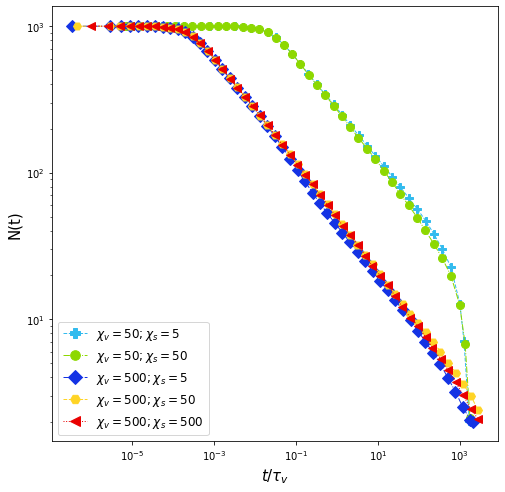

In [24]:
plt.figure(figsize=(8, 8))
plt.xscale('log')
plt.yscale('log')

show_sim = False
#rescaled = True
rescaled = False
savefig = False

npts = 50
nsim = 20

# ===================
#chiv, chis = 5, 5
#plot_conf(chis, chiv, Nt=Nt_list_N1000, wmin=-6, wmax=3, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=False)

# ===================
#chiv, chis = 5, 50
#plot_conf(chis, chiv, Nt=Nt_list_N1000, wmin=-6, wmax=3, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=False)

# ===================
#chiv, chis = 5, 500
#plot_conf(chis, chiv, Nt=Nt_list_N1000, wmin=-6, wmax=3, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=False)

chiv50 = True
if chiv50 :
    # ===================
    chiv, chis = 50, 5
    plot_conf(chis, chiv, Nt=Nt_list_N1000, wmin=-6, wmax=4, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=False)
    
    # ===================
    chiv, chis = 50, 50
    plot_conf(chis, chiv, Nt=Nt_list_N1000, wmin=-6, wmax=4, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=False)
    
    # ===================
    #chiv, chis = 50, 500
    #plot_conf(chis, chiv, Nt=Nt_list_N1000, wmin=-6, wmax=3, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=False)

chiv500 = True
if chiv500 :
    # ===================
    chiv, chis = 500, 5
    plot_conf(chis, chiv, Nt=Nt_list_N1000, wmin=-6, wmax=3, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=False)

    # ===================
    chiv, chis = 500, 50
    plot_conf(chis, chiv, Nt=Nt_list_N1000, wmin=-6, wmax=3, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=False)

    # ===================
    chiv, chis = 500, 500
    plot_conf(chis, chiv, Nt=Nt_list_N1000, wmin=-6, wmax=3, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=False)

lines = False
if lines :
    #chiv = 5
    #plt.vlines(x=(chiv/2.)**(5/2.), ymin=1, ymax = 1e3, linestyle='--')
    #Nc = 2*1000/chiv
    #plt.hlines(xmin=1e-1, xmax=1e2, y=Nc, linestyle='--', color='k')

    chiv_c = 1.
    chiv=50
    plt.vlines(x=(chiv/chiv_c)**(5/2.), ymin=1, ymax = 1e3, linestyle='-.')
    Nc = chiv_c*1000/chiv
    plt.hlines(xmin=1, xmax=1e6, y=Nc, linestyle='-.', color='k')

    chiv=500
    plt.vlines(x=1000**(5/2.), ymin=1,  ymax=1e3, linestyle='dotted')


plt.legend(fontsize=12, loc=3, markerscale=1.2)
#plt.grid()

if rescaled :
    plt.xlabel(r'$t/T_v$', fontsize=15)
else :
    plt.xlabel(r'$t/\tau_v$', fontsize=15)
    
plt.ylabel('N(t)', fontsize=15)

if rescaled :
    k, a = 300, -0.4
    t = np.logspace(0.5, 5, 101)
    #plt.plot(t, k*t**a, color = 'k')
    if savefig :
        plt.savefig('/Users/mathieuleverge/git/chain_lumen/_notebook/figures/HO_coarsening_rescaled.eps', format='eps')
else :
    k, a = 10, -0.4
    t = np.logspace(-4, 1, 101)
    #plt.plot(t, k*t**a, color = 'k')
    if savefig :
        plt.savefig('/Users/mathieuleverge/git/chain_lumen/_notebook/figures/HO_coarsening.eps', format='eps')


    
plt.show()
    

# Average bridge length

In [9]:
ell_dict = {}
chi_list = [(5, 5), (50, 5), (5, 50), (50, 50), (500, 50), (500, 500)]

for chi in chi_list :
    chis, chiv = chi[0], chi[1]
    path = os.path.join(main_dir, 'N1000', 'ell10', 'chis'+str(chis)+'_chiv'+str(chiv))
    ell_dict[chi] = {}
    for elem in os.listdir(path) :
        if elem.startswith('run') :
            key = int(elem[-4:])
            try :
                ell_dict[chi][key] = np.genfromtxt(os.path.join(path, elem, 'sim_ell_avg.dat'))
            except : pass


FileNotFoundError: [Errno 2] No such file or directory: '/Users/mathieuleverge/git/chain_lumen/_data/osmotic/N1000/ell10/chis5_chiv5'

In [ ]:
plt.figure(figsize=(8,4))
plt.xscale('log')
plt.yscale('log')
for chi in chi_list :
    chis, chiv = chi[0], chi[1]
    haslabel=False
    plot_param_list
    for sim in ell_dict[chi].keys() :
        if haslabel :
            plt.plot(ell_dict[chi][sim][1:, 0], chiv/ell_dict[chi][sim][1:, 1], color = plot_param_list[chi][0], )
        else :
            plt.plot(ell_dict[chi][sim][1:, 0], chiv/ell_dict[chi][sim][1:, 1], color = plot_param_list[chi][0], label = r'$\chi_s=$'+str(chis)+r', $\chi_v=$'+str(chiv))
            haslabel=True

#plt.hlines(xmin=1e-5, xmax=1e4, y=0.1)

t = np.logspace(-4, 3, 101)
k, a = 5, -2./5
plt.plot(t, k*t**a, color='k', linestyle='--')

plt.xlabel(r'$t/\tau_v$', fontsize=12)
plt.ylabel(r'$\xi_v / \ell(t)$', fontsize=12)
plt.grid()
plt.legend(loc=3)
plt.show()

In [ ]:
plt.xscale('log')
plt.yscale('log')
plt.plot(res_avg[:, 0], chiv/res_avg[:, 1], marker='o')

# Distribution

In [115]:
def find_tstep(time_list, t0) :
    return np.argmin(np.abs(time_list - t0))

def calc_avg_distrib(X_dict, Y_dict) :
    X_array = np.array([X_dict[k] for k in X_dict.keys()])
    X_avg = np.average(X_array, axis=0)

    Y_array = np.array([Y_dict[k] for k in Y_dict.keys()])
    Y_avg = np.average(Y_array, axis=0)
    return X_avg, Y_avg



def make_T_dict(folder, npts, nsim=20, log_tmin=-3, log_tmax=7) :
    time_plot_list = np.logspace(log_tmin, log_tmax, npts)
    T_dict = {}
    for k in range(nsim) :
        T_dict[k] = np.loadtxt(os.path.join(folder, 'run'+str(k).zfill(4)+'/distrib_length.dat'), usecols=0)
    return T_dict, time_plot_list

def make_step_dict(T_dict, time_plot_list, npts, nsim) :
    step_dict = {}
    for n in range(npts) :
        step_dict[n] = {}
        for k in range(nsim) :
            step_dict[n][k] = np.argmin(np.abs(T_dict[k] - time_plot_list[n]))
    return step_dict

def plot_distrib(step, nsim, folder, T_dict, time_plot_list, step_dict, Nt, show_hist=True, savefig=False, savename='pic.png', rescaled=True, extension='png') :
    L = []
    N = []
    C = []
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    ax[2].set_xscale('log')
    ax[2].set_yscale('log')
    
    ax[0].set_xlim(0.1, 1.80)
    ax[0].set_ylim(0., 1.)
    
    ax[1].set_ylim(0., 1.)
    ax[1].set_xlim(0., 2.)
    
    
    for k in range(nsim) :
        if 1 :
        #try :
            len_sim = len(T_dict[k])       # Length of the sim k
            step_sim = step_dict[step][k]     # Corresponding step for k
            data_L = np.genfromtxt(os.path.join(folder, 'run'+str(k).zfill(4)+'/distrib_length.dat'), skip_header=step_sim, skip_footer=len_sim-step_sim-1)
            data_N = np.genfromtxt(os.path.join(folder, 'run'+str(k).zfill(4)+'/distrib_nion.dat'), skip_header=step_sim, skip_footer=len_sim-step_sim-1)
            t_sim_L, lengths_sim = data_L[0], data_L[1:]
            t_sim_N, nion_sim = data_N[0], data_N[1:]
            concentration_sim = nion_sim/lengths_sim**2 - 1.
            #print(data)

            new_bins = np.max([10, int(np.log10(len(lengths_sim)))*10])

            #print(len(lengths_sim), bins, new_bins)

            L += [lengths_sim]
            N += [nion_sim]
            C += [concentration_sim]
            weights_L = np.ones_like(lengths_sim)/float(len(lengths_sim))
            weights_N = np.ones_like(nion_sim)/float(len(nion_sim))
            weights_C = np.ones_like(concentration_sim)/float(len(concentration_sim))
            if show_hist :
                ax[0].hist(lengths_sim/np.average(lengths_sim), bins=new_bins, label=t_sim_L, alpha=0.1, weights=weights_L)
                ax[1].hist(nion_sim/np.average(nion_sim), bins=new_bins, label=t_sim_N, alpha=0.1, weights=weights_N)
                #ax[1].hist(concentration_sim/np.average(concentration_sim), bins=new_bins, label=t_sim_N, alpha=0.1, weights=weights_C)
            ax[2].plot(Nt[k][:, 0], Nt[k][:, 1])
            
            # print the current state on the log-log plot of N(t)
            s = np.argmin(np.abs(Nt[k][:,0]-t_sim_L))
            ax[2].scatter(Nt[k][s, 0], Nt[k][s, 1])
            
        #except :
        #    pass
        
    new_L = np.concatenate([L[n] for n in range(len(L))])
    new_N = np.concatenate([N[n] for n in range(len(N))])
    new_C = np.concatenate([C[n] for n in range(len(C))])
    
    weights_L = np.ones_like(new_L)/float(len(new_L))
    weights_N = np.ones_like(new_N)/float(len(new_N))
    weights_C = np.ones_like(new_C)/float(len(new_C))
    
    y_L, x_L = np.histogram(new_L, bins=new_bins, weights=weights_L)
    y_N, x_N = np.histogram(new_N, bins=new_bins, weights=weights_N)
    y_C, x_C = np.histogram(new_C, bins=new_bins, weights=weights_C)
    
    new_x_L = 0.5*(x_L[1:]+x_L[:-1])
    new_x_N = 0.5*(x_N[1:]+x_N[:-1])
    new_x_C = 0.5*(x_C[1:]+x_C[:-1])
    
    ax[0].plot(new_x_L/np.average(new_L), y_L, color = 'k')
    ax[1].plot(new_x_N/np.average(new_N), y_N, color = 'k')
    #ax[1].plot(new_x_C/np.average(new_C), y_C, color = 'k')
    
    if rescaled :
        ax[0].set_xlabel(r'$L/\bar{L}$', fontsize=12)
        ax[1].set_xlabel(r'$N/\bar{N}$', fontsize=12)
        #ax[1].set_xlabel(r'$\delta C/c_0$', fontsize=12)
    else :
        ax[0].set_xlabel(r'$L$', fontsize=12)
        ax[1].set_xlabel(r'$N$', fontsize=12)
        #ax[1].set_xlabel(r'$\delta C$', fontsize=12)
    ax[0].set_ylabel(r'$\phi_L(t)/N(t)$', fontsize=12)
    ax[1].set_ylabel(r'$\phi_N(t)/N(t)$', fontsize=12)
    #ax[1].set_ylabel(r'$\phi_C(t)/N(t)$', fontsize=12)
    
    ax[2].set_xlabel(r'Time [s]', fontsize=12)
    ax[2].set_ylabel(r'$N(t)$', fontsize=12)
    
    plt.suptitle('t = '+"{:2.2e}".format(time_plot_list[step]), fontsize=20)
    if savefig :
        plt.savefig(savename, format = extension)
        plt.close()
    else :
        plt.show()
        

In [109]:
nsim = 20

In [110]:
subdir = 'N1000/ell10/large_tau/chis5_chiv500'

In [111]:
Nt_1000_osmotic = {}
for k in range(nsim) :
    Nt_1000_osmotic[k] = np.loadtxt(os.path.join(main_dir, subdir, 'run'+str(k).zfill(4), 'sim_nlum.dat'))
    


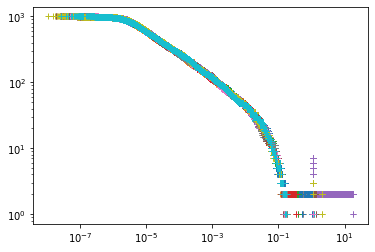

In [112]:
plt.xscale('log')
plt.yscale('log')
for k in range(nsim) :
    plt.plot(Nt_1000_osmotic[k][:, 0], Nt_1000_osmotic[k][:, 1], linewidth=0, marker='+')

In [113]:
npts = 101
nsim = 20
folder = os.path.join(main_dir, subdir)

T_dict, time_plot_list = make_T_dict(folder = folder, npts=npts, nsim=nsim, log_tmin=-7, log_tmax=-1)
step_dict = make_step_dict(T_dict, time_plot_list, npts, nsim)

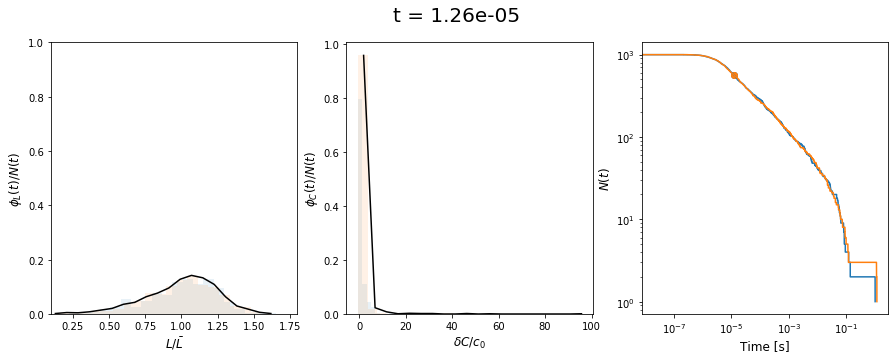

In [95]:
step=35
show_hist = True

n=0
folder = os.path.join(main_dir, subdir)
savename = os.path.join(folder, 'pic'+str(n).zfill(4)+'.png')
plot_distrib(step=step, nsim=nsim, folder=folder, T_dict=T_dict, time_plot_list=time_plot_list, step_dict=step_dict, Nt=Nt_1000_osmotic, show_hist=show_hist, savefig=False, savename=savename, rescaled=True)



In [ ]:
t = 10

L = (L1, L2, ....)

In [116]:
make_movie=True

if make_movie :
    for n in range(npts) :
        step=n

        show_hist = True
        folder = os.path.join(main_dir, subdir)
        folder2 = '/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/distributions/chis5_chiv500/'
        savename = os.path.join(folder2, 'pic'+str(n).zfill(4)+'.png')
        plot_distrib(step=step, nsim=nsim, folder=folder, T_dict=T_dict, time_plot_list=time_plot_list, step_dict=step_dict, Nt=Nt_1000_osmotic, show_hist=show_hist, savefig=True, savename=savename, rescaled=True)

        

In [19]:
chis = 5
chiv = 500
Nt_new = {}
Nt_new[(chis, chiv)] = {}
for i in range(20) :
    Nt_new[(chis, chiv)][i] = np.loadtxt(os.path.join(main_dir, 'N1000/ell10', 'chiv'+str(chiv)+'_chis'+str(chis), 'sim_nlum'+str(i).zfill(4)+'.dat'))
#plt.plot(Nt_list_N1000[(chis, chiv)][])


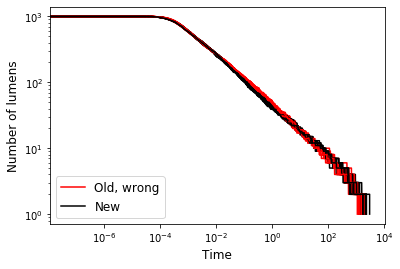

In [30]:
plt.xscale('log')
plt.yscale('log')
for i in range(20):
    if i == 1 : 
        plt.plot(Nt_list_N1000[(chis, chiv)][i][:, 0], Nt_list_N1000[(chis, chiv)][i][:, 1], color='r', label="Old, wrong")
        plt.plot(Nt_new[(chis, chiv)][i][:, 0], Nt_new[(chis, chiv)][i][:, 1], color='k', zorder=2, label="New")
    else :
        plt.plot(Nt_list_N1000[(chis, chiv)][i][:, 0], Nt_list_N1000[(chis, chiv)][i][:, 1], color='r')
        plt.plot(Nt_new[(chis, chiv)][i][:, 0], Nt_new[(chis, chiv)][i][:, 1], color='k', zorder=2)
    
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number of lumens', fontsize=12)
plt.legend(fontsize=12, loc=3)
plt.show()